In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! unzip -qq drive/MyDrive/moeimouto-faces.zip

In [ ]:
!rm -rf /content/moeimouto-faces/132_minamoto_chizuru
!rm -rf /content/moeimouto-faces/182_corticarte_apa_lagranges
!rm -rf /content/moeimouto-faces/112_hinamori_amu
!rm -rf /content/moeimouto-faces/129_primula
!rm -rf /content/moeimouto-faces/053_kousaka_tamaki
!rm -rf /content/moeimouto-faces/021_hirasawa_yui
!rm -rf /content/moeimouto-faces/060_ichinose_kotomi
!rm -rf /content/moeimouto-faces/116_pastel_ink
!rm -rf /content/moeimouto-faces/041_saigyouji_yuyuko
!rm -rf /content/moeimouto-faces/179_siesta
!rm -rf /content/moeimouto-faces/019_ayanami_rei
!rm -rf /content/moeimouto-faces/175_saotome_alto
!rm -rf /content/moeimouto-faces/192_shirakawa_kotori
!rm -rf /content/moeimouto-faces/037_lala_satalin_deviluke
!rm -rf /content/moeimouto-faces/056_nagi
!rm -rf /content/moeimouto-faces/064_amami_haruka

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

train_labels = os.listdir('/content/moeimouto-faces')
train_labels = [x for x in train_labels if x != '.DS_Store']
train_labels.sort()
print(len(train_labels))


157


In [ ]:
arr=[]
for i in train_labels:
  train_images = os.listdir('/content/moeimouto-faces/'+i)
  train_images = [y for y in train_images if y != 'color.csv']
  train_images = [y for y in train_images if y != '.DS_Store']
  for e in train_images:
    arr.append(f'/content/moeimouto-faces/{i}/{e}')
print(arr)

['/content/moeimouto-faces/000_hatsune_miku/face_409_197_37.png', '/content/moeimouto-faces/000_hatsune_miku/face_604_367_106.png', '/content/moeimouto-faces/000_hatsune_miku/face_260_173_131.png', '/content/moeimouto-faces/000_hatsune_miku/face_638_172_18.png', '/content/moeimouto-faces/000_hatsune_miku/face_341_160_137.png', '/content/moeimouto-faces/000_hatsune_miku/face_93_104_36.png', '/content/moeimouto-faces/000_hatsune_miku/face_27_136_113.png', '/content/moeimouto-faces/000_hatsune_miku/face_168_638_76.png', '/content/moeimouto-faces/000_hatsune_miku/face_531_113_29.png', '/content/moeimouto-faces/000_hatsune_miku/face_585_237_117.png', '/content/moeimouto-faces/000_hatsune_miku/face_165_132_79.png', '/content/moeimouto-faces/000_hatsune_miku/face_208_170_115.png', '/content/moeimouto-faces/000_hatsune_miku/face_858_187_45.png', '/content/moeimouto-faces/000_hatsune_miku/face_412_76_108.png', '/content/moeimouto-faces/000_hatsune_miku/face_227_303_150.png', '/content/moeimouto

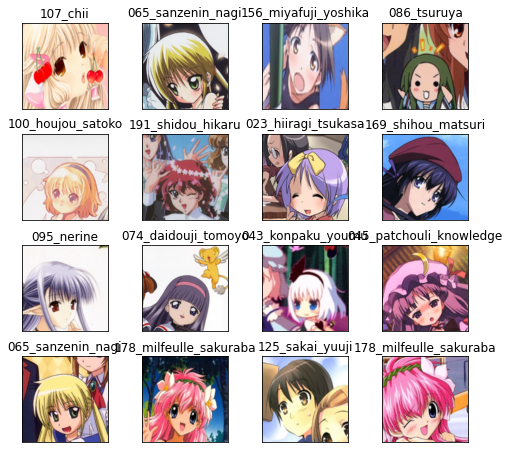

In [ ]:
sample_images=random.sample(arr,16)
fig, axes = plt.subplots(4, 4, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.4))

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(sample_images[i]).resize((180, 180)))
    sample_label=sample_images[i].split("/")[3]
    ax.set_title(sample_label) 

In [ ]:
#delete 054

In [ ]:
#!rm -rf data

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("moeimouto-faces")
new_base_dir = pathlib.Path("data")


def make_subset(subset_name, start_index, end_index):
    for category in train_labels:
        dir = new_base_dir / subset_name / category
        !rm -rf $dir
        os.makedirs(dir)
        fp = original_dir / category
        !rm -f $fp/*.csv
        files = os.listdir(fp)
        f_len = len(files)
        fnames = [files[i] for i in range(int(f_len * start_index), int(f_len * end_index))]
        for fname in fnames:
            shutil.copyfile(src=original_dir / category / fname,
                            dst=dir / fname)
make_subset("train", start_index=0, end_index=0.7)
make_subset("validation", start_index=0.7, end_index=0.85)
make_subset("test", start_index=0.85, end_index=1.0)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(160, 118, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(157, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(160, 118),
    batch_size=16,
    label_mode="categorical")
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(160, 118),
    batch_size=16,
    label_mode="categorical")
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(160, 118),
    batch_size=16,
    label_mode="categorical")

Found 8937 files belonging to 157 classes.
Found 1937 files belonging to 157 classes.
Found 2010 files belonging to 157 classes.


In [ ]:
for data_batch, labels_batch in validation_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (16, 160, 118, 3)
labels batch shape: (16, 157)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
561/561 [==============================] - 27s 27ms/step - loss: 4.5257 - accuracy: 0.0572 - val_loss: 3.5874 - val_accuracy: 0.1683
Epoch 2/20
561/561 [==============================] - 15s 26ms/step - loss: 2.8555 - accuracy: 0.3060 - val_loss: 4.4003 - val_accuracy: 0.1373
Epoch 3/20
561/561 [==============================] - 15s 27ms/step - loss: 1.9173 - accuracy: 0.5046 - val_loss: 2.1421 - val_accuracy: 0.4801
Epoch 4/20
561/561 [==============================] - 15s 26ms/step - loss: 1.4224 - accuracy: 0.6266 - val_loss: 2.2604 - val_accuracy: 0.4992
Epoch 5/20
561/561 [==============================] - 17s 30ms/step - loss: 1.0471 - accuracy: 0.7147 - val_loss: 1.7419 - val_accuracy: 0.6133
Epoch 6/20
561/561 [==============================] - 15s 26ms/step - loss: 0.7714 - accuracy: 0.7851 - val_loss: 8.3220 - val_accuracy: 0.2287
Epoch 7/20
561/561 [==============================] - 15s 26ms/step - loss: 0.5806 - accuracy: 0.8362 - val_loss: 1.7895 - val_accuracy:

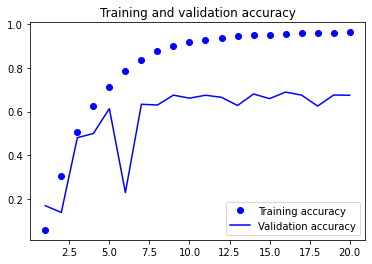

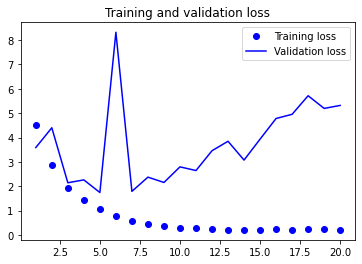

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 3s 19ms/step - loss: 1.7988 - accuracy: 0.5909
Test accuracy: 0.591


##Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

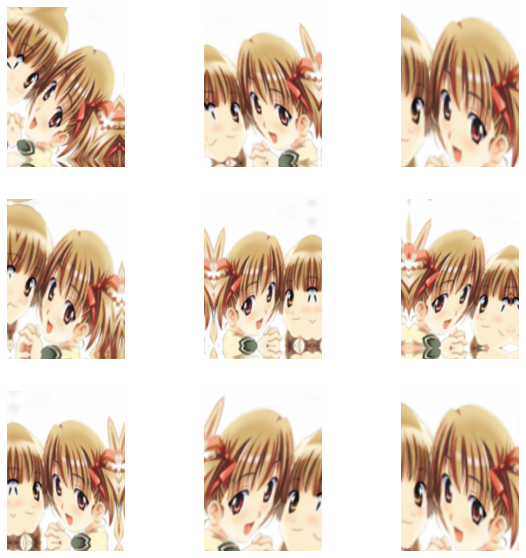

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(160, 118, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(157, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
561/561 [==============================] - 20s 33ms/step - loss: 4.4774 - accuracy: 0.0655 - val_loss: 4.3234 - val_accuracy: 0.1182
Epoch 2/50
561/561 [==============================] - 15s 27ms/step - loss: 2.7783 - accuracy: 0.3164 - val_loss: 2.9371 - val_accuracy: 0.3361
Epoch 3/50
561/561 [==============================] - 15s 27ms/step - loss: 1.8860 - accuracy: 0.5132 - val_loss: 2.7265 - val_accuracy: 0.3686
Epoch 4/50
561/561 [==============================] - 17s 30ms/step - loss: 1.3515 - accuracy: 0.6426 - val_loss: 2.8242 - val_accuracy: 0.3660
Epoch 5/50
561/561 [==============================] - 15s 27ms/step - loss: 1.0192 - accuracy: 0.7217 - val_loss: 2.1593 - val_accuracy: 0.5534
Epoch 6/50
561/561 [==============================] - 16s 27ms/step - loss: 0.7598 - accuracy: 0.7890 - val_loss: 1.6331 - val_accuracy: 0.6624
Epoch 7/50
561/561 [==============================] - 15s 27ms/step - loss: 0.5538 - accuracy: 0.8446 - val_loss: 1.7385 - val_accuracy:

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 3s 19ms/step - loss: 1.6802 - accuracy: 0.6484
Test accuracy: 0.648


##With VGG16

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(160, 118, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(157, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
559/559 [==============================] - 39s 49ms/step - loss: 62.4486 - accuracy: 0.1668 - val_loss: 39.8505 - val_accuracy: 0.3913
Epoch 2/50
559/559 [==============================] - 26s 47ms/step - loss: 45.6292 - accuracy: 0.3675 - val_loss: 31.4594 - val_accuracy: 0.5354
Epoch 3/50
559/559 [==============================] - 27s 47ms/step - loss: 39.8959 - accuracy: 0.4560 - val_loss: 29.0016 - val_accuracy: 0.5937
Epoch 4/50
559/559 [==============================] - 27s 48ms/step - loss: 35.0068 - accuracy: 0.5174 - val_loss: 28.9423 - val_accuracy: 0.6252
Epoch 5/50
559/559 [==============================] - 27s 47ms/step - loss: 31.4824 - accuracy: 0.5633 - val_loss: 28.2609 - val_accuracy: 0.6319
Epoch 6/50
559/559 [==============================] - 27s 48ms/step - loss: 30.3478 - accuracy: 0.5861 - val_loss: 28.0525 - val_accuracy: 0.6551
Epoch 7/50
559/559 [==============================] - 27s 47ms/step - loss: 28.4606 - accuracy: 0.6238 - val_loss: 29.0436 -

In [ ]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

OSError: ignored

V2;transfer learning VGG16
V3;fine tuning VGG16
V4;transfer learning inception V3
V5;fine tuning inception V3

##V3

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
561/561 [==============================] - 35s 60ms/step - loss: 13.9578 - accuracy: 0.8137 - val_loss: 29.7915 - val_accuracy: 0.7315
Epoch 2/30
561/561 [==============================] - 33s 59ms/step - loss: 11.5490 - accuracy: 0.8218 - val_loss: 26.9127 - val_accuracy: 0.7563
Epoch 3/30
561/561 [==============================] - 34s 61ms/step - loss: 9.8865 - accuracy: 0.8326 - val_loss: 24.2696 - val_accuracy: 0.7661
Epoch 4/30
561/561 [==============================] - 33s 59ms/step - loss: 9.1386 - accuracy: 0.8368 - val_loss: 24.7423 - val_accuracy: 0.7780
Epoch 5/30
561/561 [==============================] - 34s 61ms/step - loss: 8.2005 - accuracy: 0.8409 - val_loss: 21.6843 - val_accuracy: 0.7553
Epoch 6/30
561/561 [==============================] - 33s 59ms/step - loss: 7.5119 - accuracy: 0.8468 - val_loss: 20.5920 - val_accuracy: 0.7734
Epoch 7/30
561/561 [==============================] - 33s 59ms/step - loss: 7.1886 - accuracy: 0.8446 - val_loss: 21.4622 - val_

##V4

In [ ]:
import tensorflow as tf
model_inception = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(160,118,3),
    weights="imagenet",
)
model_inception.trainable=False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

x = data_augmentation(inputs)
x = tf.keras.applications.inception_v3.preprocess_input(x)
x = model_inception(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(157, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model_inception.summary()

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="non_trainable_inception.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

##V5

In [ ]:
model_inception.trainable=True
for layer in model_inception.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_inception.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)